<a href="https://colab.research.google.com/github/Pranavesh-Panakkal/CEVE-562-Python-demo/blob/main/Notebook_3_Plotting_and_jupyter_widgets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Notebook 3: Plotting and ipywidgets (jupyter-widgets)

### Topics
-  ipywidgets
- Seaborn
- CartoPy

# 1. ipywidgets
Tools to interact with Python functions

In [1]:
import ipywidgets as widgets
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import r2_score

## 1a. The Interact function

In [ ]:
def degrees_to_radians(degree: float) -> float:
    """
    A function to convert degrees to radians
    """
    return degree * np.pi /180

# Create a widget to interact with the function
widgets.interact(degrees_to_radians, degree=[0, 45, 90, 135, 180]);

interactive(children=(Dropdown(description='degree', options=(0, 45, 90, 135, 180), value=0), Output()), _dom_…

## 1b. Example 1. Curve fitting

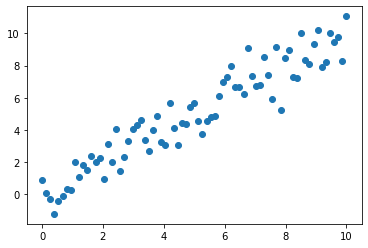

In [ ]:
# Generate x data
x = np.linspace(0, 10, 75)
# Generate y data
y = np.random.randint(1, 5)* x + np.random.normal(size=len(x))
# Create a plot
fig, ax = plt.subplots()
ax.scatter(x,y )

In [ ]:
def plot_line(slope, const):
    y_hat = slope * x + const
    plt.scatter(x,y)
    plt.plot(x, y_hat, linestyle= 'dotted', color='red', linewidth=3, label='$\hat{y}=mx+c$')
    plt.ylim(min(y)-2, max(y)+2)
    plt.plot([], [], ' ', label=f"$R^2$ = {r2_score(y, y_hat):.2f}")
    plt.legend()


In [ ]:
widgets.interact(plot_line, slope=(0, 5, 0.05), const=(-5, 10,1))

interactive(children=(FloatSlider(value=2.0, description='slope', max=5.0, step=0.05), IntSlider(value=2, desc…

<function __main__.plot_line>

## 1c. Example 2. Demand and Capacity

In [2]:
from ipywidgets import *
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import norm

def plot_demand_capacity(demand_mean = 1.0, demand_std=10, capacity_mean=1.0, capacity_std=10):

    _range = [demand_mean+4*demand_std, demand_mean-4*demand_std, capacity_mean+4*capacity_std, capacity_mean-4*capacity_std]
    x_max = max(_range)
    x_min = min(_range)

    x = np.linspace(x_min, x_max, 1000)

    demand_normal_dist = norm(loc=demand_mean, scale=demand_std)
    capacity_normal_dist = norm(loc=capacity_mean, scale=capacity_std)

    y_demand = demand_normal_dist.pdf(x)
    y_capacity = capacity_normal_dist.pdf(x)

    plt.plot(x, y_demand, label='Demand', color='red')
    plt.fill_between(x, y_demand, color='red', alpha=0.3)

    plt.plot(x, y_capacity, label='Capacity', color='green')
    plt.fill_between(x, y_capacity, color='green', alpha=0.3)

    plt.legend()

    plt.xlim(x_min,x_max)

# layout = widgets.Layout(width='200%', height='100px')
interact(plot_demand_capacity, demand_mean = (50, 100, 1), demand_std= (0.1, 10, 1), capacity_mean=(95, 150, 1), capacity_std=(0.1, 20, 1));#, layout=layout

interactive(children=(IntSlider(value=50, description='demand_mean', min=50), FloatSlider(value=10.0, descript…

# 2. Seaborn

A Python plotting library

## 2a. Example random walks

In [3]:
import seaborn as sns
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import random

In [4]:
start = np.random.randint(0, 5)

def get_a_walk(number_steps: int=5) -> list:
    """
    Generate a sample walk (1D)
    """
    # Get a start point
    start = np.random.randint(0, 5)
    # Sample steps
    # Random walk in 1D
    # direction = ['north', 'south', "same"]
    direction = [1, -1, 0]
    steps = [random.choice(direction) for _ in range(number_steps-1)]
    # steps = [1 if dir=='north' else 0 for dir in steps]
    final_walk = np.cumsum([start] + steps)
    return final_walk

def generate_a_walk(id=0, number_steps=5):
    """Generates a random walk as a dataframe"""
    return pd.DataFrame({'step':range(number_steps), 
                        'position': get_a_walk(number_steps),
                        'walk':[id]*number_steps})
    
def generate_1d_walks(number_of_samples):
    return pd.concat([generate_a_walk(id) for id in range(number_of_samples)], ignore_index=True)

In [5]:
random_walks = generate_1d_walks(number_of_samples=20)

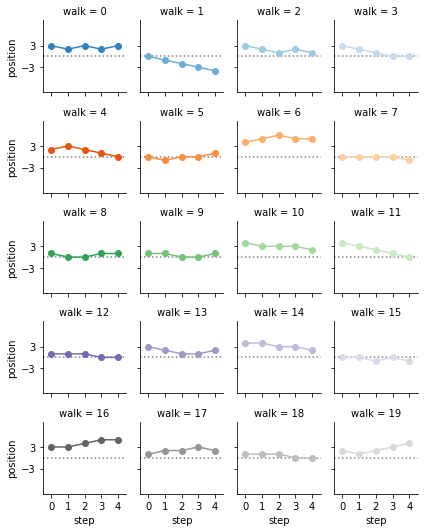

In [6]:
# This example is inspired from https://seaborn.pydata.org/examples/many_facets.html

# Initialize a grid of plots with an Axes for each walk
grid = sns.FacetGrid(random_walks, col="walk", hue="walk", palette="tab20c",
                     col_wrap=4, height=1.5)

# Draw a horizontal line to show the starting point
grid.refline(y=0, linestyle=":")

# Draw a line plot to show the trajectory of each random walk
grid.map(plt.plot, "step", "position", marker="o")

# Adjust the tick positions and labels
grid.set(xticks=np.arange(5), yticks=[-3, 3],  xlim=(-.5, 4.5), ylim=(-10, 10))

# Adjust the arrangement of the plots
grid.fig.tight_layout(w_pad=1)

# 3. CartoPy

A python package for plotting geodata

#4. Bokeh and Plotly

Interactive plotting in Python